## Useful Links 

[Sending/receiving tables and images over SAMP — Astropy v1.3.2](http://docs.astropy.org/en/stable/vo/samp/example_table_image.html)

## Start 

Start a [SAMPHubServer](http://docs.astropy.org/en/stable/api/astropy.vo.samp.SAMPHubServer.html) using the Astropy class.

In [1]:
from astropy.vo.samp import SAMPHubServer
hub = SAMPHubServer()
hub.start()

INFO: Hub set to run with Web Profile support enabled. [astropy.vo.samp.hub]
INFO: Hub started [astropy.vo.samp.hub]


Check if `SAMPHubServeris` running.

In [2]:
hub.is_running

True

Create a SAMP client via Astropy `SAMPIntegratedClient`

In [3]:
import urllib
from astropy.table import Table
from astropy.vo.samp import SAMPIntegratedClient

client = SAMPIntegratedClient()
client.connect()

class Receiver(object):
    def __init__(self, client):
        self.client = client
        self.received = False
    def receive_call(self, private_key, sender_id, msg_id, mtype, params, extra):
        self.params = params
        self.received = True
        self.client.reply(msg_id, {"samp.status": "samp.ok", "samp.result": {}})
    def receive_notification(self, private_key, sender_id, mtype, params, extra):
        self.params = params
        self.received = True

r = Receiver(client)

client.bind_receive_call("table.load.votable", r.receive_call)
client.bind_receive_notification("table.load.votable", r.receive_notification)

# client.bind_receive_call("table.load.cdf", r.receive_call)
# client.bind_receive_notification("table.load.cdf", r.receive_notification)

# client.bind_receive_call("table.load.fits", r.receive_call)
# client.bind_receive_notification("table.load.fits", r.receive_notification)

Go to [VESPA Query Interface](http://vespa.obspm.fr/planetary/data/epn/query/submit/all/?target_name=&granule_uid=&granule_gid=&obs_id=&measurement_type=&time_search_type_op=is_included_in&time_interval_type_op=between&time_min=&time_max=&time_center=&time_delta_value_op=&time_delta_unit_op=days&spatial_frame_type=&location_interval_op=intersection&location_values_op=between&c1min=&c1max=&c1center=&c1delta=&c2min=&c2max=&c2center=&c2delta=&c3min=&c3max=&c3center=&c3delta=&c1_resol_min=&c1_resol_max=&c1_resol_center=&c1_resol_delta=&c2_resol_min=&c2_resol_max=&c2_resol_center=&c2_resol_delta=&c3_resol_min=&c3_resol_max=&c3_resol_center=&c3_resol_delta=&spectral_interval_op=intersection&spectral_unit_op=hertz&spectral_range_min=&spectral_range_max=&spectral_resolution_min=&spectral_resolution_max=&spectral_sampling_step_min=&spectral_sampling_step_max=&time_exp_min_op=%3E%3D&time_exp_min=&time_exp_max_op=%3C%3D&time_exp_max=&time_sampling_step_min_op=%3E%3D&time_sampling_step_min=&time_sampling_step_max_op=%3C%3D&time_sampling_step_max=&phase_min_op=%3E%3D&phase_min=&phase_max_op=%3C%3D&phase_max=&incidence_min_op=%3E%3D&incidence_min=&incidence_max_op=%3C%3D&incidence_max=&emergence_min_op=%3E%3D&emergence_min=&emergence_max_op=%3C%3D&emergence_max=&instrument_host_name=&instrument_name=&species=&feature_name=) and click one "Send with SAMP" on a whole dataset or on a specific data product. 

Here we get all the [CRISM data](http://vespa.obspm.fr/planetary/data/epn/query/submit/all/?target_name=&granule_uid=&granule_gid=&obs_id=&measurement_type=&time_search_type_op=is_included_in&time_interval_type_op=between&time_min=&time_max=&time_center=&time_delta_value_op=&time_delta_unit_op=days&spatial_frame_type=&location_interval_op=intersection&location_values_op=between&c1min=&c1max=&c1center=&c1delta=&c2min=&c2max=&c2center=&c2delta=&c3min=&c3max=&c3center=&c3delta=&c1_resol_min=&c1_resol_max=&c1_resol_center=&c1_resol_delta=&c2_resol_min=&c2_resol_max=&c2_resol_center=&c2_resol_delta=&c3_resol_min=&c3_resol_max=&c3_resol_center=&c3_resol_delta=&spectral_interval_op=intersection&spectral_unit_op=hertz&spectral_range_min=&spectral_range_max=&spectral_resolution_min=&spectral_resolution_max=&spectral_sampling_step_min=&spectral_sampling_step_max=&time_exp_min_op=%3E%3D&time_exp_min=&time_exp_max_op=%3C%3D&time_exp_max=&time_sampling_step_min_op=%3E%3D&time_sampling_step_min=&time_sampling_step_max_op=%3C%3D&time_sampling_step_max=&phase_min_op=%3E%3D&phase_min=&phase_max_op=%3C%3D&phase_max=&incidence_min_op=%3E%3D&incidence_min=&incidence_max_op=%3C%3D&incidence_max=&emergence_min_op=%3E%3D&emergence_min=&emergence_max_op=%3C%3D&emergence_max=&instrument_host_name=&instrument_name=&species=&feature_name=#collapse_6)

The `Receiver.received` should be true and `Receiver.params` should containt the data URL.

In [6]:
r.received

True

In [7]:
r.params

{'name': 'crism',
 'url': 'http://epn1.epn-vespa.jacobs-university.de/__system__/tap/run/tap/sync?LANG=ADQL&QUERY=SELECT+%2A+FROM+crism.epn_core+WHERE+%281+%3D+ivo_hashlist_has%28lower%28%22target_name%22%29%2Clower%28%27Mars%27%29%29+OR+1+%3D+ivo_hashlist_has%28lower%28%22target_name%22%29%2Clower%28%274%27%29%29%29+&REQUEST=doQuery&MAXREC=1000000000'}

Load the data from the `Receiver` with `astropy.table.Table.read`

In [8]:
t = Table.read(r.params['url'])

In [9]:
t

granule_uid,granule_gid,obs_id,dataproduct_type,target_name,target_class,time_min,time_max,time_sampling_step_min,time_sampling_step_max,time_exp_min,time_exp_max,spectral_range_min,spectral_range_max,spectral_sampling_step_min,spectral_sampling_step_max,spectral_resolution_min,spectral_resolution_max,c1min,c1max,c2min,c2max,c3min,c3max,s_region,c1_resol_min,c1_resol_max,c2_resol_min,c2_resol_max,c3_resol_min,c3_resol_max,spatial_frame_type,incidence_min,incidence_max,emergence_min,emergence_max,phase_min,phase_max,instrument_host_name,instrument_name,measurement_type,processing_level,creation_date,modification_date,release_date,service_title,access_url,access_format,access_estsize,thumbnail_url,bib_reference,solar_longitude_min,solar_longitude_max,sensor_id,image_width,image_height,subgranule_url
,,,,,,d,d,s,s,s,s,Hz,Hz,Hz,Hz,Hz,Hz,deg,deg,deg,deg,m,m,,deg,deg,deg,deg,m,m,,deg,deg,deg,deg,deg,deg,,,,,,,,,,,kbyte,,,deg,deg,,pix,pix,
object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,object,object,int32,object,object,object,object,object,object,int32,object,object,float64,float64,object,int32,int32,object
HRL000052FF_07_IF155L_TRR3,HRL,000052FF,sc,Mars,planet,2454197.2650845898,2454197.26512782,--,--,--,--,1001.3,3936.8000000000002,6.5499999999999998,6.5499999999999998,9.6999999999999993,17.5,255.99100000000001,256.35199999999998,-32.155000000000001,-32.012999999999998,--,--,Polygon UNKNOWNFrame 103.649 -32.096 103.739 -32.097 103.824 -32.124 103.909 -32.155 103.995 -32.149 103.996 -32.15 103.998 -32.135 104.004 -32.103 104.009 -32.07 103.917 -32.073 103.83 -32.049 103.746 -32.015 103.66 -32.013 103.653 -32.06 103.648 -32.097,0.0061186440677959602,0.0061186440677959602,0.0052592592592593697,0.0052592592592593697,--,--,body,54.748085021972699,54.748085021972699,60.414237976074197,60.414237976074197,62.098415374755902,62.098415374755902,MRO,CRISM,phys.albedo,3,2016-01-01,2016-01-01,2016-01-01,CRISM,http://access.planetserver.eu:8080/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=hrl000052ff_07_if155l_trr3&FORMAT=image/tiff,application/x-geotiff,2810,"http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20%28%20hrl000052ff_07_if155l_trr3%20%29%20return%20encode%28%20{%20red:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_54%29%20-%20min%28data.band_54%29%29%29%20*%20%28data.band_54%20-%20min%28data.band_54%29%29%29;%20green:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_37%29%20-%20min%28data.band_37%29%29%29%20*%20%28data.band_37%20-%20min%28data.band_37%29%29%29;%20blue:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_27%29%20-%20min%28data.band_27%29%29%29%20*%20%28data.band_27%20-%20min%28data.band_27%29%29%29%20;%20alpha:%20%28float%29%28%28data.band_100%20%3E%200%29%20*%20255%29},%20%22png%22,%20%22nodata=65535%22%29",10.1029/2006JE002682,214.20289700000001,214.20289700000001,L,59,27,http://epn1.epn-vespa.jacobs-university.de:8080/subGranule/index.html?cov=hrl000052ff_07_if155l_trr3&c1_min=255.991&c1_min=255.991&c1_max=256.352&c2_min=-32.155&c2_max=-32.013&E_px=59&N_px=27&sensor_id=l
HRL00005C79_07_IF156S_TRR3,HRL,00005C79,sc,Mars,planet,2454240.21110263,2454240.2111458401,--,--,--,--,364.60000000000002,1056.0,6.5499999999999998,6.5499999999999998,8.5999999999999996,10.0,326.18099999999998,326.53300000000002,22.989999999999998,23.100000000000001,--,--,Polygon UNKNOWNFrame 33.483 23.1 33.569 23.097 33.653 23.088 33.739 23.086 33.819 23.079 33.815 23.021 33.812 22.99 33.725 22.998 33.549 23.008 33.467 23.014 33.474 23.052 33.48 23.091,0.0054153846153851097,0.0054153846153851097,0.0047826086956523003,0.0047826086956523003,--,--,body,65.986427307128906,

Now let's load the footprints definiton in the `Table['s_region']` in a `GeoPandas.GeoDataFrame`.

In [11]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.wkt as swkt
from shapely.geometry import Polygon
import re

Some auxiliary functions to convert the `Table['s_region']` in valid WKT for Polygons

In [12]:
def getParts(sRegion):
    lon=sRegion.split(' ')[2:][0::2]
    lon=np.asarray([float(i) for i in lon])
    if (lon.max()-lon.min()) > 180:
        lon = [[x, x-360][x>180] for x in lon]
    lat=sRegion.split(' ')[2:][1::2]
    parts = [[360-float(lon[i]),float(lat[i])] for i in range(len(lat))]
    if not (parts[0]==parts[-1]): parts.append(parts[0])
    return [parts]

def s_region_to_wkt(coded_s_region):
    q = getParts(re.sub(r'Polygon UNKNOWNFrame ', '', coded_s_region.decode("utf-8") ))[0]
    return 'POLYGON (('+','.join([' '.join([str(x) for x in y]) for y in q])+'))'

v_s_region_to_wkt = np.vectorize(s_region_to_wkt)

Define the crs, get the Table ad `Pandas.DataFrame` and define the geometry as list of `shapely.wkt` Polygon objects. 

In [13]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(t.to_pandas(), crs=crs, geometry=[swkt.loads(s_region_to_wkt(ob)) for ob in t['s_region']])

In [185]:
gdf

,granule_uid,granule_gid,obs_id,dataproduct_type,target_name,target_class,time_min,time_max,time_sampling_step_min,time_sampling_step_max,...,access_estsize,thumbnail_url,bib_reference,solar_longitude_min,solar_longitude_max,sensor_id,image_width,image_height,subgranule_url,geometry
0,b'HRL000052FF_07_IF155L_TRR3',b'HRL',b'000052FF',b'sc',b'Mars',b'planet',2.454197e+06,2.454197e+06,NaN,NaN,...,2810.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',214.202897,214.202897,b'L',59.0,27.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((256.261 -32.097, 256.176 -32.124, 25..."
1,b'HRL00005C79_07_IF156S_TRR3',b'HRL',b'00005C79',b'sc',b'Mars',b'planet',2.454240e+06,2.454240e+06,NaN,NaN,...,645.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',241.037198,241.037198,b'S',65.0,23.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((326.431 23.097, 326.347 23.088, 326...."
2,b'FRT00004512_07_IF155S_TRR3',b'FRT',b'00004512',b'sc',b'Mars',b'planet',2.454150e+06,2.454150e+06,NaN,NaN,...,484.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',185.905456,185.905456,b'S',66.0,17.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((19.63499999999999 -47.327, 19.517999..."
3,b'FRT0000474F_07_IF156L_TRR3',b'FRT',b'0000474F',b'sc',b'Mars',b'planet',2.454156e+06,2.454156e+06,NaN,NaN,...,3669.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',189.592447,189.592447,b'L',80.0,26.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((295.366 -13.065, 295.31 -13.076, 295..."
4,b'HRS000068E0_07_IF173S_TRR3',b'HRS',b'000068E0',b'sc',b'Mars',b'planet',2.454291e+06,2.454291e+06,NaN,NaN,...,38033.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',273.017684,273.017684,b'S',248.0,355.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((342.447 -86.839, 342.377 -86.931, 34..."
5,b'HRS000068E0_07_IF173L_TRR3',b'HRS',b'000068E0',b'sc',b'Mars',b'planet',2.454291e+06,2.454291e+06,NaN,NaN,...,156555.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',273.017684,273.017684,b'L',250.0,355.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((342.449 -86.83799999999999, 342.415 ..."
6,b'HRS00006F75_07_IF173S_TRR3',b'HRS',b'00006F75',b'sc',b'Mars',b'planet',2.454319e+06,2.454319e+06,NaN,NaN,...,38581.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',290.294420,290.294420,b'S',253.0,353.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((289.228 -87.042, 289.184 -87.087, 28..."
7,b'HRS0000681B_07_IF173S_TRR3',b'HRS',b'0000681B',b'sc',b'Mars',b'planet',2.454287e+06,2.454287e+06,NaN,NaN,...,38733.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',270.376283,270.376283,b'S',254.0,353.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((17.57799999999997 -86.944, 17.543999..."
8,b'HRS00006F75_07_IF173L_TRR3',b'HRS',b'00006F75',b'sc',b'Mars',b'planet',2.454319e+06,2.454319e+06,NaN,NaN,...,158336.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',290.294419,290.294419,b'L',255.0,352.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,"POLYGON ((289.237 -87.04000000000001, 289.194 ..."
9,b'HRS0000681B_07_IF173L_TRR3',b'HRS',b'0000681B',b'sc',b'Mars',b'planet',2.454287e+06,2.454287e+06,NaN,NaN,...,158957.0,b'http://access.planetserver.eu:8080/rasdaman/...,b'10.1029/2006JE002682',270.376283,270.376283,b'L',256.0,352.0,b'http://epn1.epn-vespa.jacobs-university.de:8...,POLYGON ((17.57999999999998 -86.94199999999999...


Simply plot the whole data (it takes a while...)

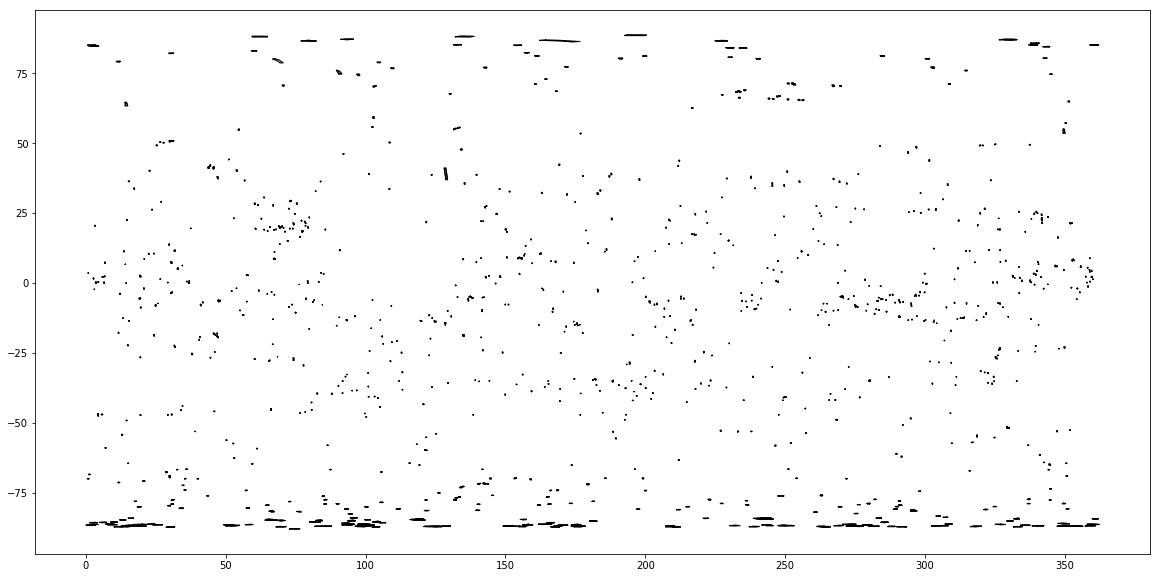

In [14]:
gdf.plot(figsize=[20,10])


Some zooming in to show the footprints.

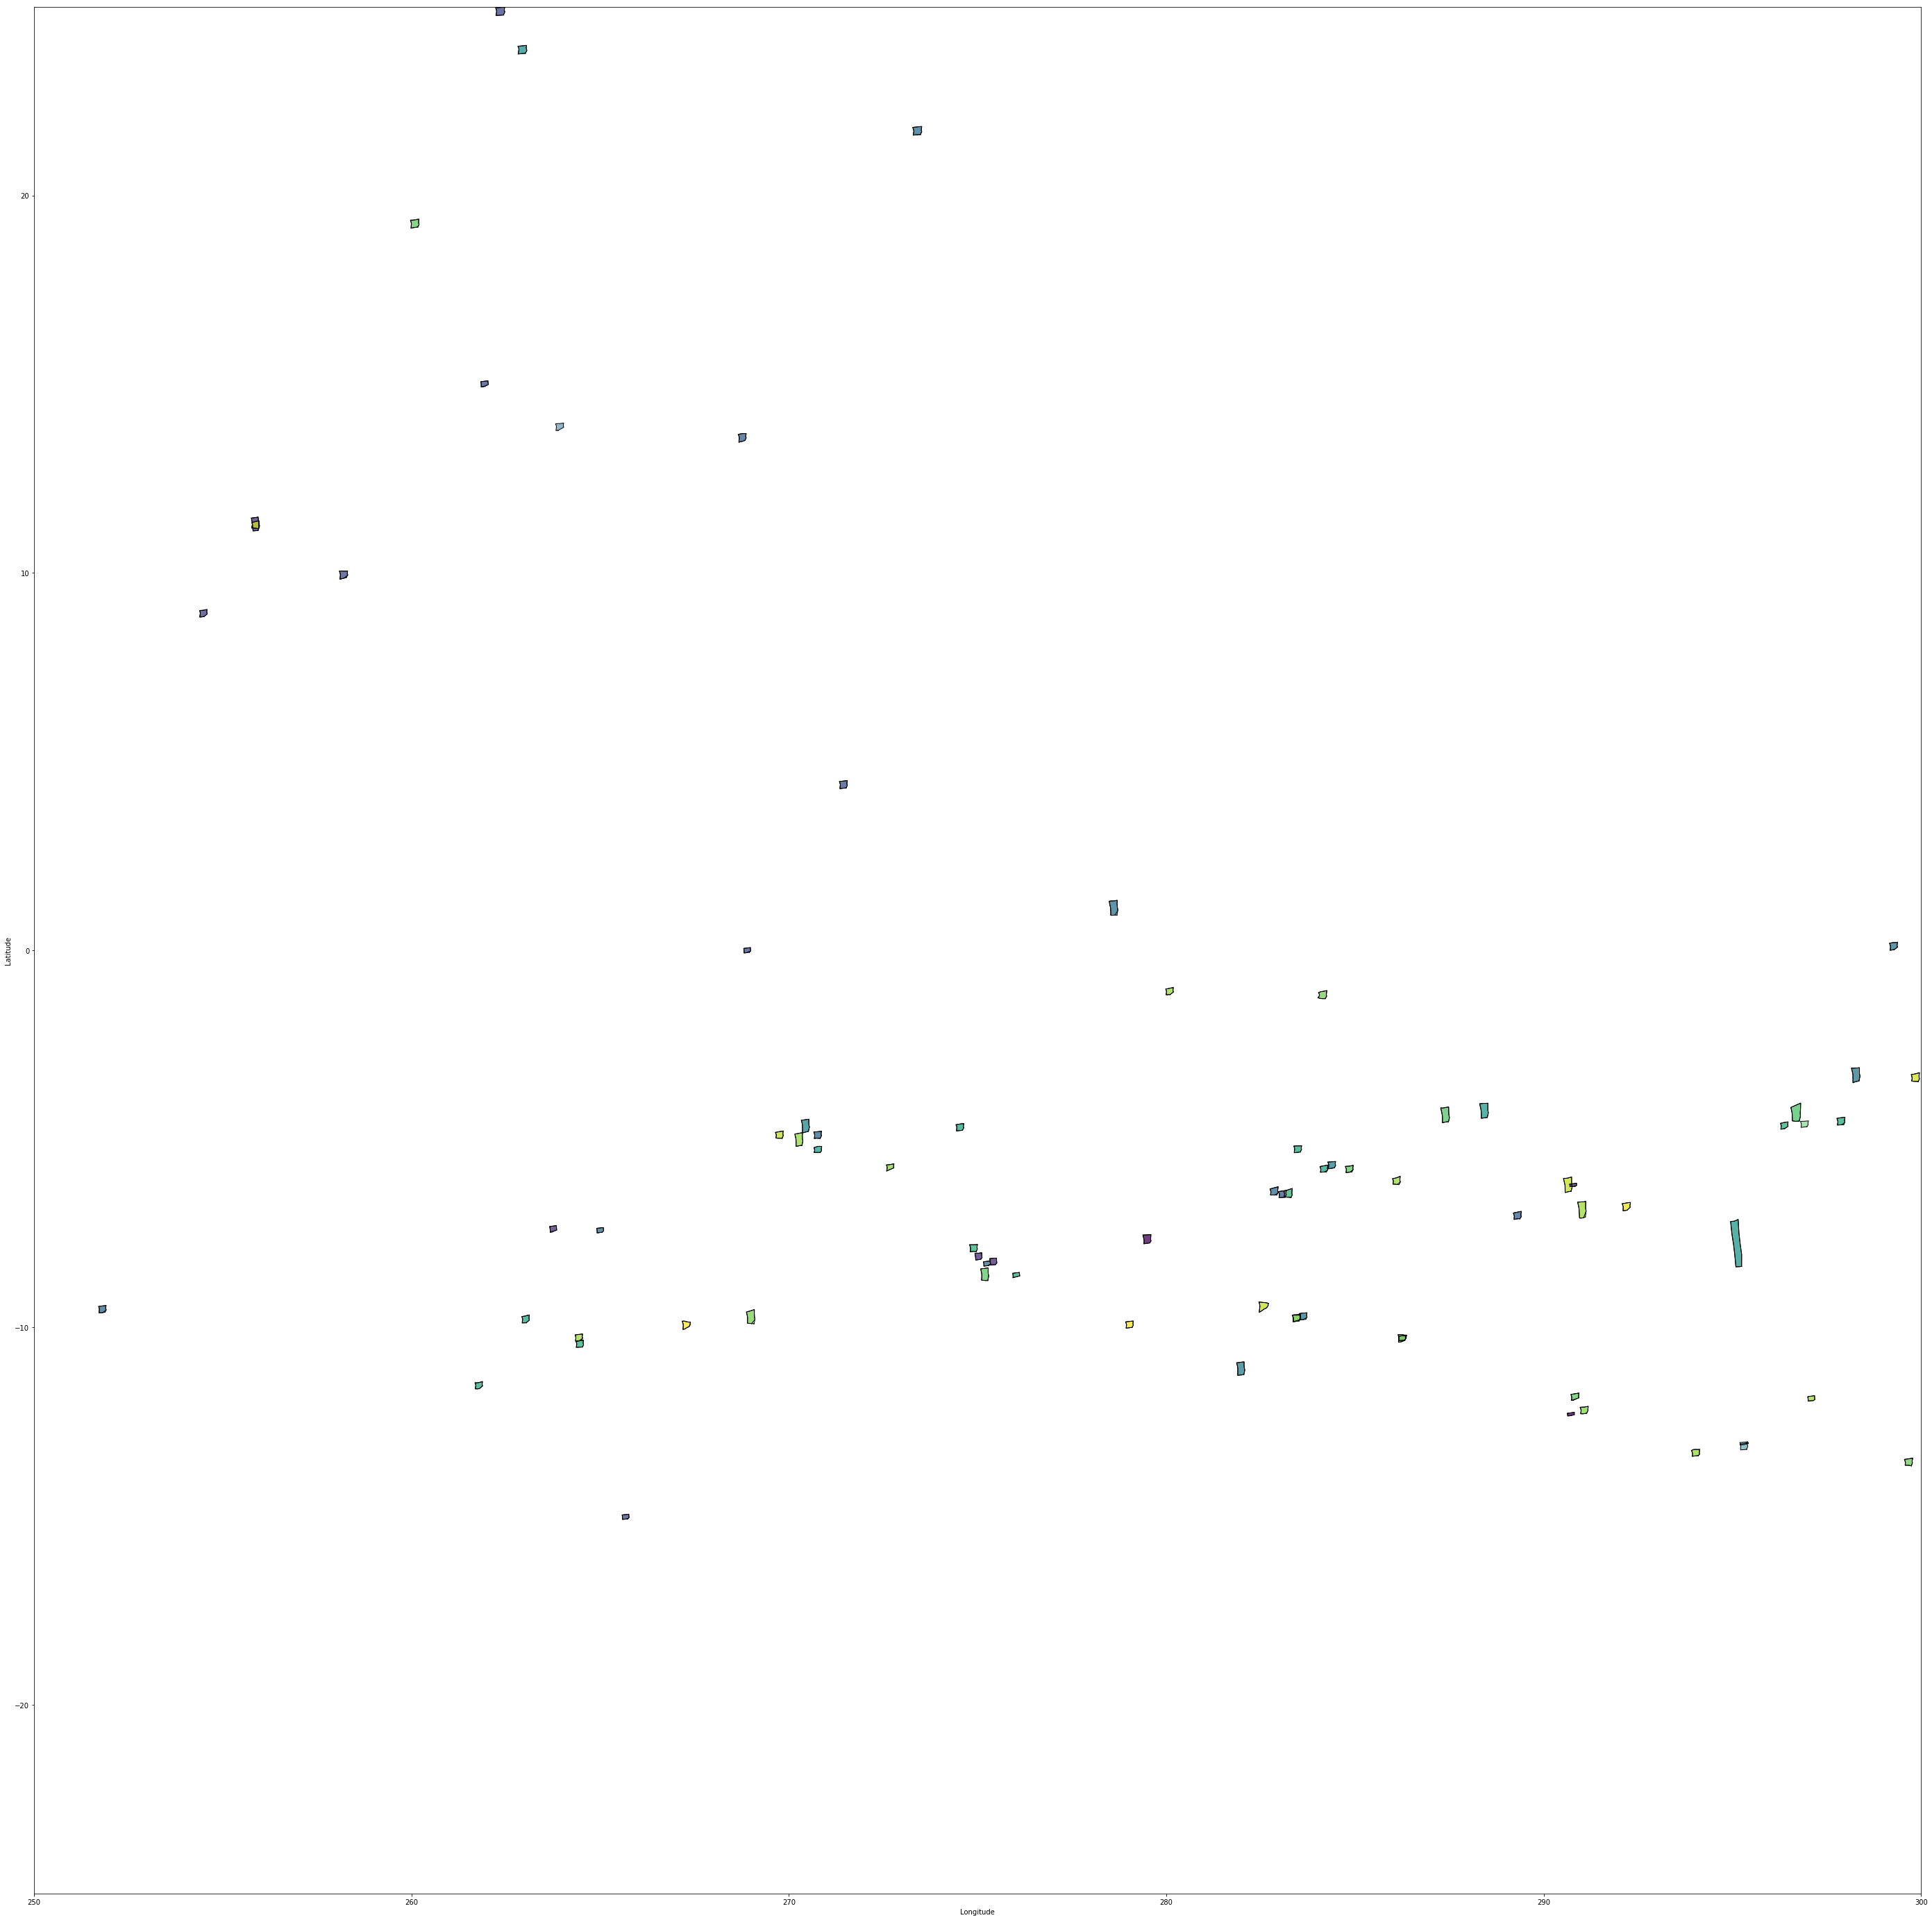

In [15]:
lonmin , lonmax , latmin , latmax = 250, 300, -25, 25

tmp = gdf[(gdf.c1min > lonmin) & (gdf.c1max < lonmax) & (gdf.c2min > latmin) & (gdf.c2max < latmax)]

tmp.plot(figsize=[(lonmax-lonmin),(latmax-latmin)], column= 'solar_longitude_min')

plt.xlim([lonmin,lonmax])
plt.ylim([latmin,latmax])
plt.xlabel('Longitude')
plt.ylabel('Latitude')